In [1]:
from PIL import Image
import numpy as np

##### chair의 이미지 해상도를 통일하여 적용하기 : Test

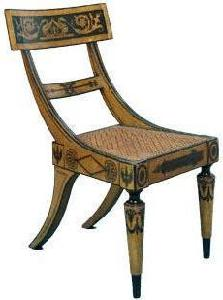

In [2]:
# chair의 1번 이미지
img = Image.open("../Data/chair/image_0001.jpg")
img

In [3]:
# 배열 확인
np.array(img).shape

(300, 223, 3)

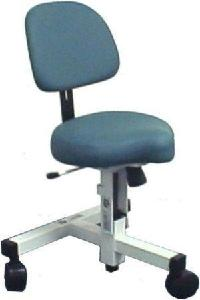

In [4]:
# chair의 2번 이미지
img = Image.open("../Data/chair/image_0002.jpg")
img

In [5]:
# 배열 확인
np.array(img).shape

(300, 200, 3)

> Image의 해상도가 일정하지 않음    
전체 이미지의 해상도의 최대값을 가지고 적용해보자!

##### chair의 전체이미지의 평균 해상도 구하기

In [6]:
import glob

In [7]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [8]:
print('chair의 너비 최대 해상도 :', np.mean(widthRatio))
print('chair의 높이 최대 해상도 :', np.mean(heightRatio))

chair의 너비 최대 해상도 : 229.65
chair의 높이 최대 해상도 : 297.31666666666666


> 너비 : 230, 높이 : 298으로 정함!

---
##### chair 이미지 해상도 변경 및 Gray Scale로 적용

In [9]:
i = 1
for file in sorted(glob.glob("../Data/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/chairNew/image_%04d.jpg"%i, "JPEG")
    i += 1

##### Laptop의 이미지 해상도 변경 및 GrayScale 적용

In [10]:
i = 1
for file in sorted(glob.glob("../Data/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((230, 298), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L')
    imgResize.save("../Data/laptopNew/image_%04d.jpg"%i, "JPEG")
    i += 1

#### chair Image를 Numpy로 변경하기

In [11]:
number_of_data = 60
img_width_size = 230
img_height_size = 298

In [12]:
chairData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [13]:
i = 0
for file in sorted(glob.glob("../Data/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    img = np.invert(img) # 역상
    chairData[i,:,:] = img
    i+=1

In [14]:
chairData.shape

(60, 298, 230)

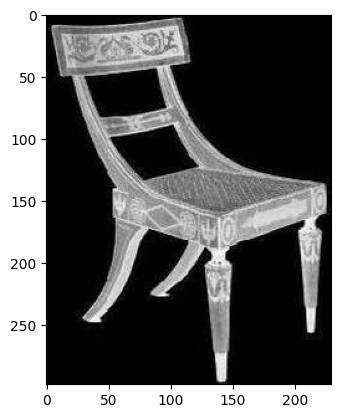

In [15]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(298, 230), cmap='gray')
plt.show()

##### laptop Image를 numpy로 변경하기

In [16]:
laptopData = np.zeros(
    number_of_data * img_width_size * img_height_size,
    dtype=np.int32
).reshape(
    number_of_data,
    img_height_size,
    img_width_size
)

In [17]:
i = 0
for file in sorted(glob.glob("../Data/laptopNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    img = np.invert(img) # 역상
    laptopData[i,:,:] = img
    i+=1

In [18]:
laptopData.shape

(60, 298, 230)

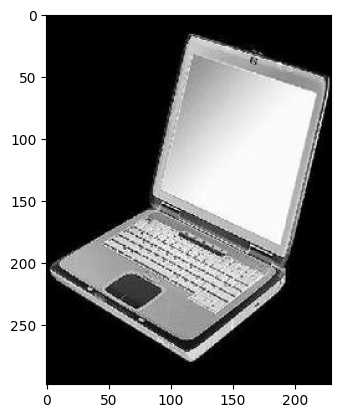

In [19]:
# 이미지 확인하기
plt.imshow(laptopData[0].reshape(298, 230), cmap='gray')
plt.show()

----
#### numpy data를 train data로 합치기

In [20]:
train = np.concatenate(
    [chairData, laptopData]
)
train.shape

(120, 298, 230)

#### target data

In [21]:
target = np.concatenate(
    [np.zeros(60), np.ones(60)]
)
target.shape

(120,)

In [22]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

---
#### 정규화

In [23]:
train = train.reshape(-1, 298, 230, 1) / 255.0

#### train과 test 분리

In [24]:
# !pip install scikit-learn

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
trainData, testData, trainTarget, testTarget = \
                            train_test_split(
                                train,
                                target,
                                test_size=0.2,
                                random_state=42
                            )

In [27]:
print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

(96, 298, 230, 1)
(24, 298, 230, 1)
(96,)
(24,)


#### CNN 만들기

In [28]:
# !pip install tensorflow

In [29]:
from tensorflow import keras
from tensorflow.keras.layers import Input

In [44]:
model = keras.Sequential()

model.add(
    Input(shape=(298, 230, 1))
)

model.add(
    keras.layers.Conv2D(
        32,
        kernel_size=3,
        activation='relu',
        padding='same'
    )
)

model.add(
    keras.layers.MaxPooling2D(2)
)

model.add(
    keras.layers.Conv2D(
        64,
        kernel_size=3,
        activation='relu',
        padding='same'
    )
)

model.add(
    keras.layers.MaxPooling2D(2)
)


In [45]:
model.add(
    keras.layers.Flatten()
)

model.add(
    keras.layers.Dense(100, activation= 'relu')
)

model.add(
    keras.layers.Dropout(0.4)
)

model.add(
    keras.layers.Dense(
        2,
        activation='sigmoid'
    )
)

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 298, 230, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 149, 115, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 149, 115, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 57, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 269952)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │    26,995,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,014,318 (103.05 MB)

 Trainable params: 27,014,318 (103.05 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_cnn_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(
                                patience=5,
                                restore_best_weights=True
)

In [50]:
history = model.fit(
                trainData,
                trainTarget,
                epochs=50,
                validation_data=(testData, testTarget),
                callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5417 - loss: 6.7584 - val_accuracy: 0.4583 - val_loss: 4.6804
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5000 - loss: 2.5421 - val_accuracy: 0.5417 - val_loss: 1.5106
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5729 - loss: 1.2267 - val_accuracy: 0.5000 - val_loss: 0.6846
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6250 - loss: 0.6301 - val_accuracy: 0.6250 - val_loss: 0.6065
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8021 - loss: 0.4701 - val_accuracy: 0.8333 - val_loss: 0.4569
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8958 - loss: 0.3358 - val_accuracy: 0.6250 - val_loss: 0.6857
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9167 - loss: 0.2814 - val_accuracy: 0.8333 - val_loss: 0.3621
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9479 - loss: 0.2169 - val_accuracy: 0.8333 - val_loss: 0.4265
Epoch 9/50
3/3 ━

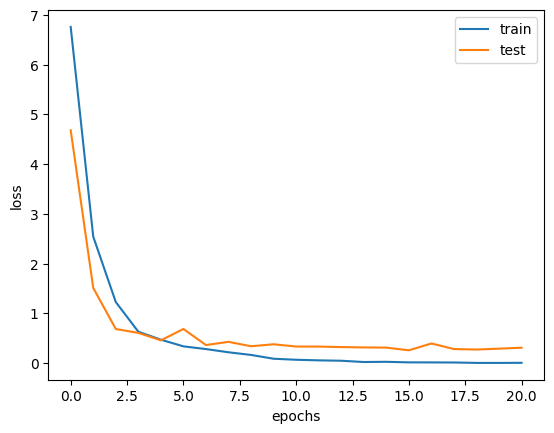

In [51]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [52]:
model.evaluate(trainData, trainTarget)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.0053


[0.005289793014526367, 1.0]

In [53]:
model.evaluate(testData, testTarget)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.8333 - loss: 0.2565


[0.25650858879089355, 0.8333333134651184]

#### 이미지 확인해보기

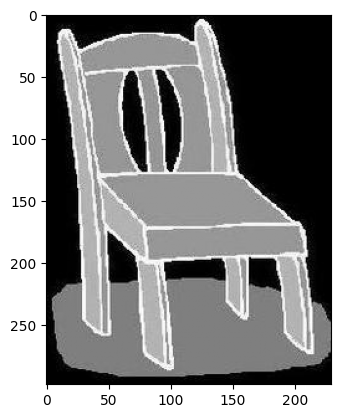

In [54]:
plt.imshow(testData[0].reshape(298, 230), cmap='gray')
plt.show()

In [55]:
pred = model.predict(testData[0:1])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[7.0634818e-01, 3.5456583e-04]], dtype=float32)

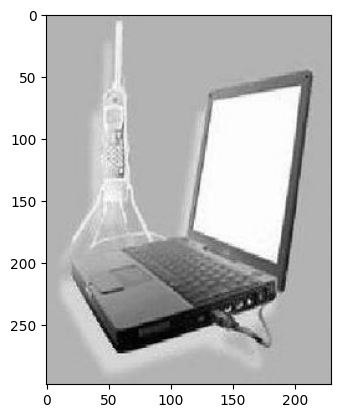

In [56]:
plt.imshow(testData[20].reshape(298, 230), cmap='gray')
plt.show()

In [57]:
pred = model.predict(testData[20:21])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.20987278, 0.20067069]], dtype=float32)